In [1]:
from sympy import Symbol, lambdify
import matplotlib.pyplot as plt
import numpy as np

In [2]:
x = Symbol('x')

The local minimum occurs at -4.999998938845185


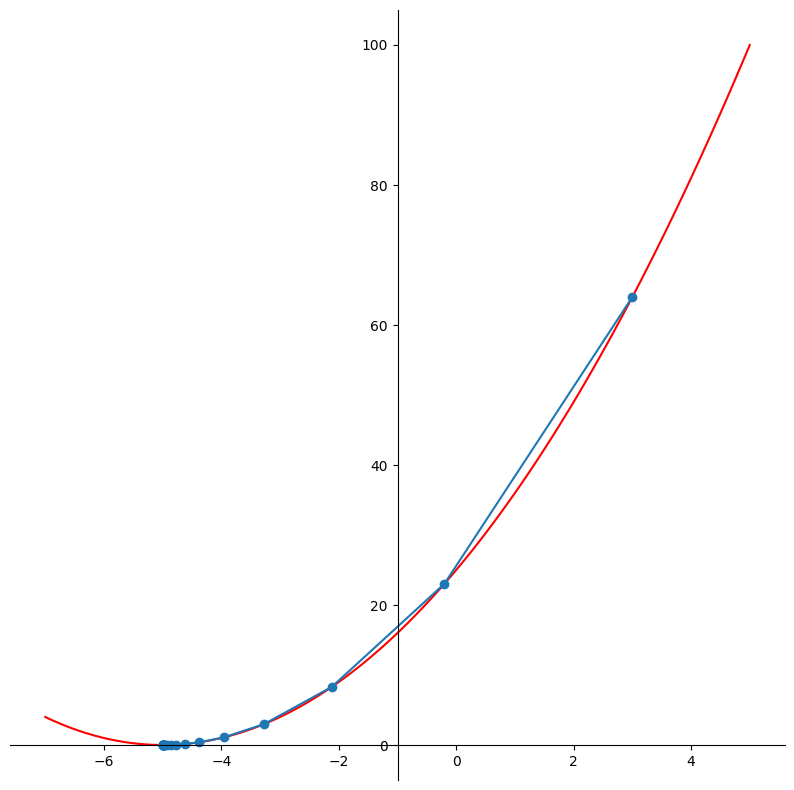

In [5]:
def gradient_descent(
    function, start, learn_rate, n_iter=10000, tolerance=1e-06, step_size=1
):
    gradient = lambdify(x, function.diff(x))
    function = lambdify(x, function)
    points = [start]
    iters = 0  # iteration counter

    while step_size > tolerance and iters < n_iter:
        prev_x = start  # Store current x value in prev_x
        start = start - learn_rate * gradient(prev_x)  # Grad descent
        step_size = abs(start - prev_x)  # Change in x
        iters += 1  # iteration count
        points.append(start)
    print("The local minimum occurs at", start)

    # Create plotting array
    x_ = np.linspace(-7, 5, 100)
    y = function(x_)

    # Setting the axes at the center
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # Plot the function
    plt.plot(x_, y, 'r')
    plt.plot(points, function(np.array(points)), '-o')

    # Show the plot
    plt.show()

# Define the function and call gradient_descent
function = (x + 5)**2
gradient_descent(
     function=function, start=3.0, learn_rate=0.2, n_iter=50
)